In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
from sklearn.cluster import KMeans

In [73]:
# 이미지 파일 경로
img_path = '../dataset/ReTree/train/images/10000_image.png'

# 이미지 불러오기
img = cv2.imread(img_path)

In [74]:
img.shape

(512, 512, 3)

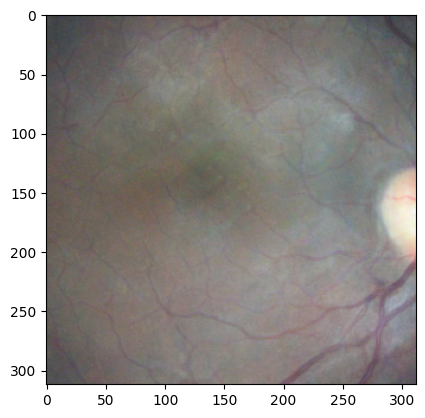

In [75]:
plt.imshow(cv2.cvtColor(img[100:(512-100), 100:(512-100)], cv2.COLOR_BGR2RGB))

# 1. Blur 처리

In [76]:
blured = img[100:(512-100), 100:(512-100)] #  cv2.blur(img[100:(512-100), 100:(512-100)], (7,7))

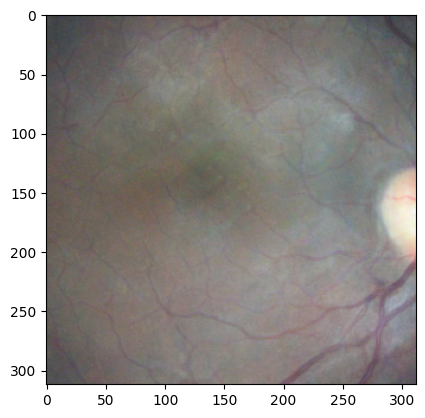

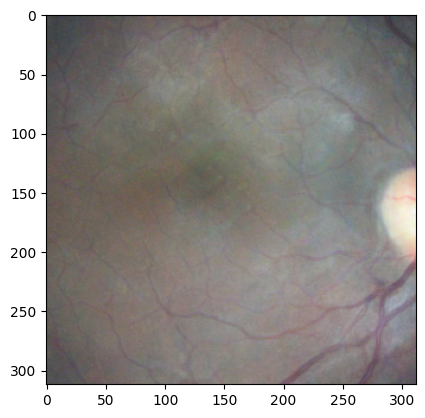

In [77]:
plt.imshow(cv2.cvtColor(img[100:(512-100), 100:(512-100)], cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(blured, cv2.COLOR_BGR2RGB)) 
plt.show()

# 2. 대표값 추출

(312, 312, 3)
<class 'numpy.ndarray'>
(14400, 3)
(120, 120, 3)


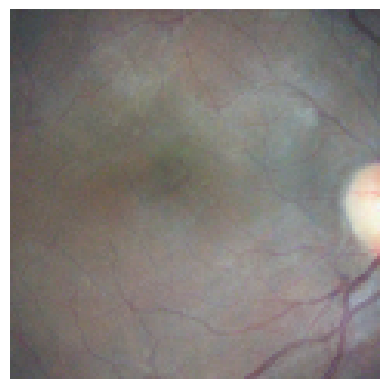

In [83]:
img_dominant = cv2.cvtColor(blured, cv2.COLOR_BGR2RGB)
print(img_dominant.shape)
r, c = img_dominant.shape[:2]
out_r = 120
img_dominant = cv2.resize(img_dominant, (int(out_r*float(c)/r), out_r))
print(type(img_dominant))
pixels = img_dominant.reshape((-1, 3))
print(pixels.shape)
print(img_dominant.shape)
plt.axis("off")
plt.imshow(img_dominant)

In [84]:
km = KMeans(n_clusters=8)
km.fit(pixels)

/home/sihwa/anaconda3/envs/shp_diffae/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [85]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')
print(colors)

[[140 136 134]
 [112 105 100]
 [ 81  79  81]
 [227 213 195]
 [132 127 123]
 [102  95  89]
 [123 116 111]
 [151 148 147]]


In [86]:
percentage = np.asarray(np.unique(km.labels_, return_counts = True)[1], dtype='float32')
percentage = percentage/pixels.shape[0]
percentage

array([0.1720139 , 0.15791667, 0.05166667, 0.01638889, 0.19486111,
       0.14847222, 0.15708333, 0.10159722], dtype=float32)

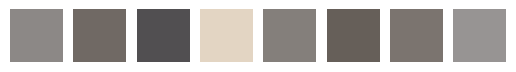

In [87]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = colors[ix]
    patch = patch.astype('int')
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis('off')
    plt.imshow(patch)
plt.show()

In [67]:
dom = [[percentage[ix], colors[ix]] for ix in range(km.n_clusters)]
dominance = sorted(dom, key=lambda x:x[0], reverse=True)

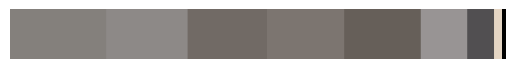

In [68]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(dominance[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = dominance[cx][1]
    patch = patch.astype('int')
    start = end
plt.imshow(patch)
plt.show()

In [69]:
for px in range(pixels.shape[0]):
    for ix in range(colors.shape[0]):
        pixels[px] =colors[km.labels_[px]]

In [71]:
img_quan = pixels.reshape(out_r, -1, 3)
print(img_quan.shape)

(120, 120, 3)


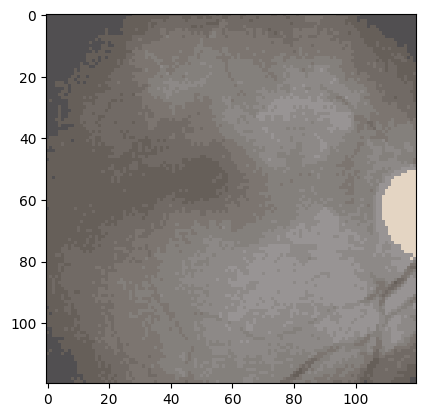

In [72]:
plt.imshow(img_quan)

# 3. positional encoding